# Matplotlib and Seaborn

Python provides many packages to support numerical calculations. In practice, however, besides operating on numbers, in some cases we have to work with images. This is the time for us to use the visualization packages. In this script, we will introduce two frequently-used packages to process images, i.e., Seaborn and Matplotlib. Let's go through the tutorials step by step to see the functions of these two packages and figure out what we can do with these two packages.

When stepping into big data era, one has to face various data in multiple formats. Among them, the most simple case is your data be in some kind of tidy format. In short, a tidy dataset is a tabular dataset where:

* each variable is a column
* each observation is a row
* each type of observational unit is a table

This script targets on illustrate Matplotlib and Seaborn packages. As a consequence, the data provided to you in the script will all be tidy, in practice, however, you may need to perform **tidying work before exploration**. You should be comfortable with reshaping your data or perform transformations to split or combine features in your data, resulting in new data columns. This work should be performed in the wrangling stage of the data analysis process, so if you need to know more about these operations, it is recommended that you refer back to the data wrangling content from earlier in the program.

In this course, we will use Numpy and Pandas to store the data, and Matplotlib and Seaborn to create our visualization.

* Data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# magic command: allow plots to be rendered directly inside the notebook
%matplotlib inline

In [70]:
pokemon = pd.read_csv('../data/pokemon.csv')
print(pokemon.shape, type(pokemon))
pokemon.head(5)

(807, 14) <class 'pandas.core.frame.DataFrame'>


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## 1. Bar chart

A **bar chart** is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">countplot</code> function:

<AxesSubplot:xlabel='generation_id', ylabel='count'>

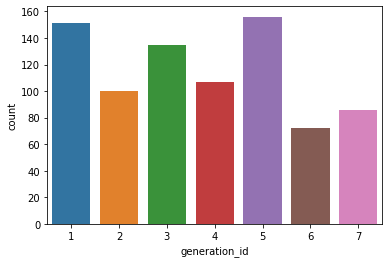

In [3]:
sb.countplot(data = pokemon, x = 'generation_id')

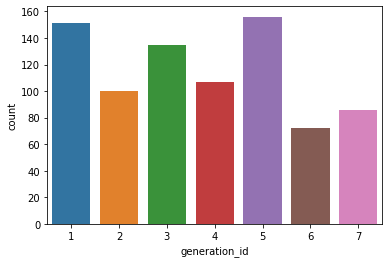

In [4]:
sb.countplot(data = pokemon, x = 'generation_id');  # disable the text information by adding a semicolon at end

* Visualize the color panel

In [5]:
sb.color_palette()
# ----------------------------------------------------------------------#
#        You can uncomment the following code to see the results        #
#        The hotkey to uncomment: Ctrl + /                              #
# --------------------------------------------------------------------- #
# print(sb.color_palette())  # print the color panel in (R, G, B) format

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

By default, each category is given a different color. This might come in handy for building associations between these category labels and encodings in plots with more variables. Otherwise, it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color. This can be set using the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">color</code> parameter:

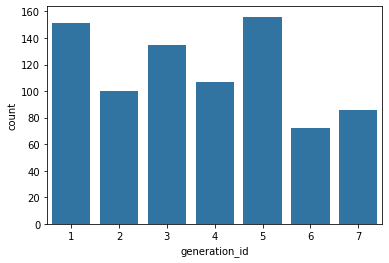

In [6]:
# Unify the color to make the plot cleaner
# ----------------------------------------
base_color = sb.color_palette()[0]  # select the first color in the panel as the bar color

sb.countplot(data = pokemon, x = 'generation_id', color=base_color);  # setting the color through 
                                                                      # color argument

One thing that we might want to do with a bar chart is to **sort the data** in some way. For nominal-type data, one common operation is to sort the data in terms of frequency. With our data in a **pandas DataFrame**, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter:

Value of gen_order: Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')


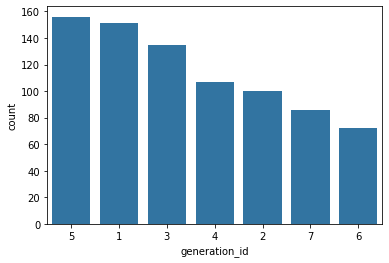

In [7]:
base_color = sb.color_palette()[0]

# use value_counts() method to sort the number list
gen_order = pokemon['generation_id'].value_counts().index
print('Value of gen_order:', gen_order)  # show what the gen_order looks like

# Plot the ordered bar chart by setting the order argument
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

Reading materials: (Documentation: [Series.value_counts()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

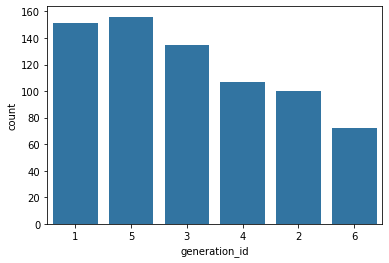

In [8]:
# Notice: you can also sort the bar plot manually.
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = [1, 5, 3, 4, 2, 6]);

Let's move on to a different category variable <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">Type 1</code>, and generate the bar chart.

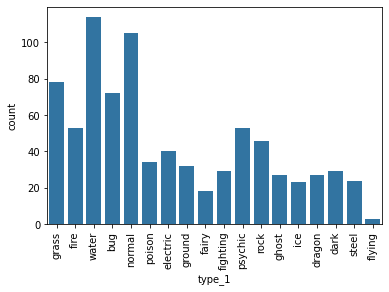

In [9]:
# Example: rotate the labels of x-axis

base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'type_1', color = base_color);
plt.xticks(rotation = 90);  # by setting the rotation args to 90, the labels are turned 90 degree

If you have a lot of category levels, or the category names are long, then you might end up with overcrowding of the tick labels. One way to address this is through creation of a horizontal bar chart. In a horizontal bar chart, it is the length of each bar that indicates frequency, rather than the height. In the code, instead of setting the data or variable on the "x" parameter, you can set the variable to be plotted on the parameter <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">y</code>:

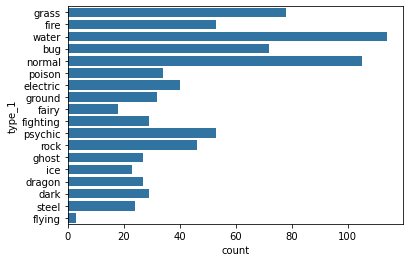

In [10]:
# Example: plot the horizontal bar chart

base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, y = 'type_1', color = base_color);

* Sort the bar chart according to the order

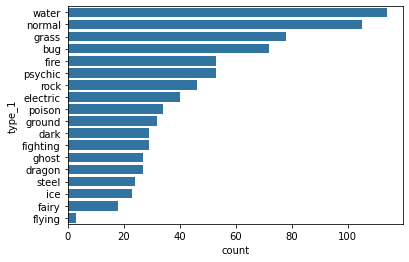

In [11]:
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

## 2. Pie Charts
A **pie chart** is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken.

![](../materials/images/projects/piecharts2.png)

Pie chart (left) and bar chart (right) displaying the same categorical counts.

Unfortunately, pie charts are a fairly limited plot type in the range of scenarios where they can be used, and it is easy for chart makers to try and spice up pie charts in a way that makes them more difficult to read. If you want to use a pie chart, try to follow certain guidelines:

* Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
* Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
* Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.

If these guidelines cannot be met, then you should probably make use of a bar chart instead. A bar chart is a safer choice in general. The bar heights are more precisely interpreted than areas or angles, and a bar chart can be displayed more compactly than a pie chart. There's also more flexibility with a bar chart for plotting variables with a lot of levels, like plotting the bars horizontally.

You can create a pie chart with matplotlib's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">pie</code> function. This function requires that the data be in a summarized form: the primary argument to the function will be the wedge sizes.

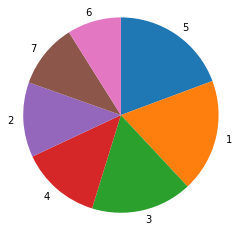

In [12]:
# code for the pie chart seen above
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

To follow the guidelines in the bullet points above, I include the "startangle = 90" and "counterclock = False" arguments to start the first slice at vertically upwards, and will plot the sorted counts in a clockwise fashion. The axis function call makes it so that the scaling of the plot is equal on both the x- and y-axes. Without this call, the circle may not look like a circle in the final product.

### Additional Variation
A sister plot to the pie chart is the **donut plot**. It's just like a pie chart, except that there's a hole in the center of the plot. Perceptually, there's not much difference between a donut plot and a pie chart, and donut plots should be used with the same guidelines as a pie chart. Aesthetics might be one of the reasons why you would choose one or the other. For instance, you might see statistics reported in the hole of a donut plot to better make use of available space.

To create a donut plot, you can add a <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">wedgeprops</code> argument to the pie function call. By default, the radius of the pie (circle) is 1; setting the wedges' width property to less than 1 removes coloring from the center of the circle.

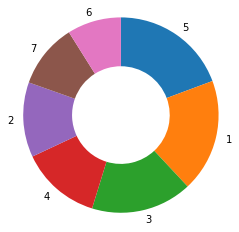

In [13]:
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.5});
plt.axis('square');

## 3. Histograms
A **histogram** is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">hist</code> function:

In [14]:
pokemon.head(5)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


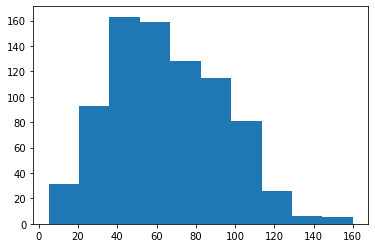

In [15]:
plt.hist(data = pokemon, x = 'speed');

You can see that there are about 25 data points that fall in the range between about 0 and 25 in the leftmost bin, and about 100 points in the range from about 25 to 50 in the adjacent bin. Overall, a generally bimodal distribution is observed. The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasize the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

By default, the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">hist</code> function divides the data into **10** bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret. Wouldn't it be better if I said "between 0 and 2.5" instead of "between about 0 and 25", and "from 25 to 50" instead of "from about 25 to 50" above?

You can use descriptive statistics (e.g. via <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">df['num_var'].describe()</code>) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">arange</code> function:

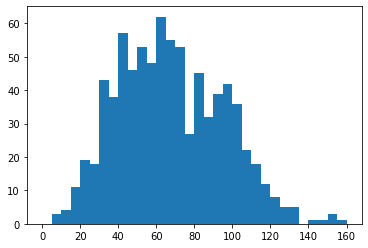

In [16]:
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

The first argument to <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">arange</code> is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. Note that even though I've specified the "max" value in the second argument, I've added a "+5" (the bin width). That is because <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">arange</code> will only return values that are strictly less than the upper limit. Adding in "+5" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">around</code> if you wanted to approach that end programmatically.

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

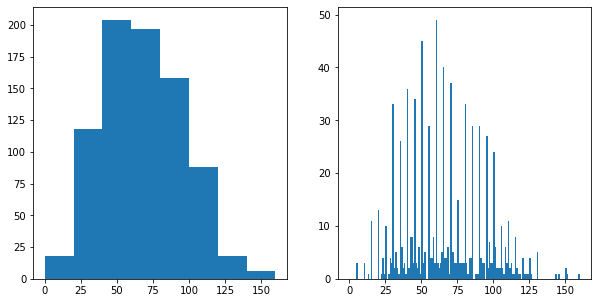

In [17]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+20, 20)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

This example puts two plots side by side through use of the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">subplot</code> function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">figure()</code> function is called with the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">figsize</code> parameter so that we can have a larger figure to support having multiple subplots.

### Alternative Approach
The seaborn function <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">distplot</code> can also be used to plot a histogram, and is integrated with other univariate plotting functions.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


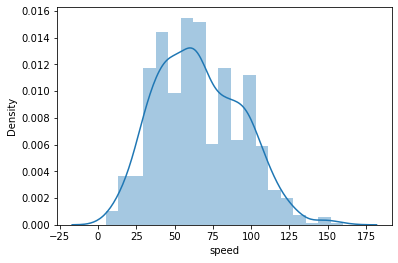

In [18]:
# Note: if you see some warning, at this stage you can ignore them...

sb.distplot(pokemon['speed']);
# sb.distplot(pokemon['speed'], kde=False);   # try setting the kde = False, and see the results

Note that the first argument must be the Series or array with the points to be plotted, rather than being able to specify a data source and column.

The <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">distplot</code> function has built-in rules for specifying histogram bins, and by default plots a kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1.

Despite the fact that the default <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">distplot</code> bin size might be better than the fixed 10 of <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">.hist</code>, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

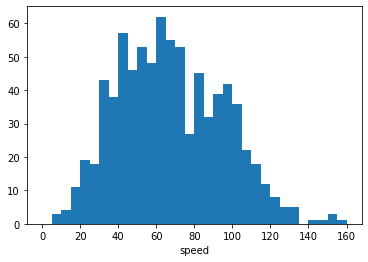

In [19]:
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
sb.distplot(pokemon['speed'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1})

The alpha (transparency) setting must be associated as a dictionary to <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">hist_kws</code> since there are other underlying plotting functions, like the KDE, that have their own optional keyword parameters.

The result of the code above is exactly like the histogram above with bin width of 1. The units of the vertical axis are also back in terms of counts.

In summary, if your exploration is only interested in the histogram-depiction of the data, and not the additional bits offered by <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">distplot</code>, then you might be better off with just using Matplotlib's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">hist</code> function for simplicity. On the other hand, if you want a quick start on choosing a representative bin size for histogram plotting, you might take a quick look at the basic <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">distplot</code> first before getting into the customization.

## 4. Figures, Axes, and Subplots
At this point, you've seen and had some practice with some basic plotting functions using matplotlib and seaborn. The previous page introduced something a little bit new: creating two side-by-side plots through the use of matplotlib's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">subplot()</code> function. If you have any questions about how that or the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">figure()</code> function worked, then read on. The following will discuss the basic structure of visualizations using matplotlib and how subplots work in that structure.

The base of a visualization in matplotlib is a [Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html) object. Contained within each Figure will be one or more [Axes](https://matplotlib.org/stable/api/axes_api.html) objects, each Axes object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly. Let's say that the following expression is run inside a Jupyter notebook to create a histogram:
```python
plt.hist(data = pokeman, x = 'Speed')
```
Since we don't have a Figure area to plot inside, Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.



![](../materials/images/projects/subplotsa.png)

This hierarchy of objects is useful to know about so that we can take more control over the layout and aesthetics of our plots. One alternative way we could have created the histogram is to explicitly set up the Figure and Axes like this:

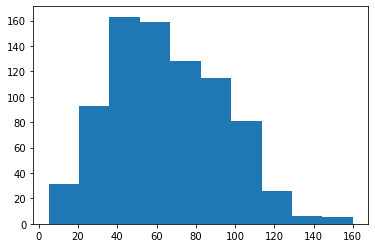

In [20]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data = pokemon, x = 'speed');

<code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">figure()</code> creates a new Figure object, a reference to which has been stored in the variable <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">fig</code>. One of the Figure methods is <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">.add_axes()</code>, which creates a new Axes object in the Figure. The method requires one list as argument specifying the dimensions of the Axes: the first two elements of the list the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure) and the last two elements specifying the Axes width and height, respectively. We refer to the Axes in the variable <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">ax</code>. Finally, we use the Axes method <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">.hist()</code> just like we did before with <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">plt.hist()</code>.

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.

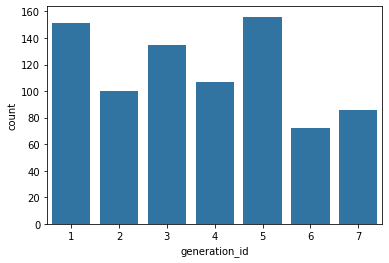

In [21]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax)

In the above two cases, there was no purpose to explicitly go through the Figure and Axes creation steps. And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. Each function targets a Figure or Axes, and they'll automatically target the most recent Figure or Axes worked with. As an example of this, let's review in detail how <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">subplot()</code> was used on the Histograms page:

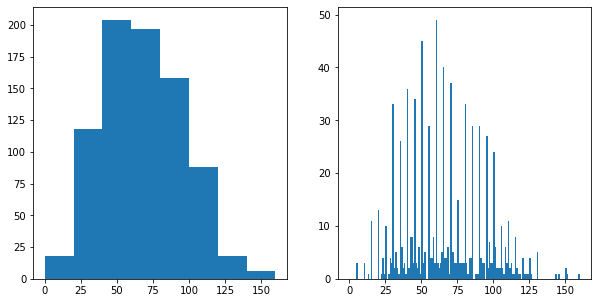

In [22]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+20, 20)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

First of all, <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">plt.figure(figsize = [10, 5])</code> creates a new Figure, with the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">figsize</code> argument setting the width and height of the overall figure to 10 inches by 5 inches, respectively. Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a Figure will refer to that Figure as the active one.

Then, <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">plt.subplot(1, 2, 1)</code> creates a new Axes in our Figure, its size determined by the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">subplot()</code> function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). (You'll see the indexing a little better in the example at the end of the page.) Again, Python will implicitly set that Axes as the current Axes, so when the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">plt.hist()</code> call comes, the histogram is plotted in the left-side subplot.

Finally, <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">plt.subplot(1, 2, 2)</code> creates a new Axes in the second subplot slot, and sets that one as the current Axes. Thus, when the next <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">plt.hist()</code> call comes, the histogram gets drawn in the right-side subplot.

### 4.1 Additional Techniques
To close this section, we'll quickly run through a few other ways of dealing with **Axes** and **subplots**. The techniques above should suffice for basic plot creation, but you might want to keep the following in the back of your mind as additional tools to break out as needed.

If you don't assign Axes objects as they're created, you can retrieve the current Axes using <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">ax = plt.gca()</code>, or you can get a list of all Axes in a Figure <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">fig</code> by using <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">axes = fig.get_axes()</code>. As for creating subplots, you can use <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">fig.add_subplot()</code> in the same way as <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">plt.subplot()</code> above. If you already know that you're going to be creating a bunch of subplots, you can use the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">plt.subplots()</code> function:

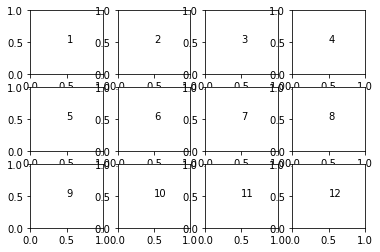

In [23]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

As a special note for the text, the Axes limits are `[0,1]` on each Axes by default, and we increment the iterator counter <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">i</code> by 1 to get the subplot index, if we were creating the subplots through <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">subplot()</code>. (Reference: <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">plt.sca()</code>, <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">plt.text()</code>)

### 4.2 Documentation
Documentation pages for Figure and Axes objects are linked below. Note that they're pretty dense, so I don't suggest reading them until you need to dig down deeper and override matplotlib or seaborn's default behavior. Even then, they are just reference pages, so they're better for skimming or searching in case other internet resources don't provide enough detail.

* [Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html)
* [Axes](https://matplotlib.org/stable/api/axes_api.html)

## 5. Choosing a Plot for Discrete Data

If you want to plot a discrete quantitative variable, there’s a couple of ideas that you’ll want to consider. Since data points fall on set values, it can help to reduce ambiguity by putting bin edges between the actual values taken by the data. Your readers may not know that values on bin edges end up in the bin to their right, so this can help remove potential confusion. Compare the two visualizations of 100 random die rolls below (in <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">die_rolls</code>), with bin edges on the values on the left, and bin edges in between values on the right.

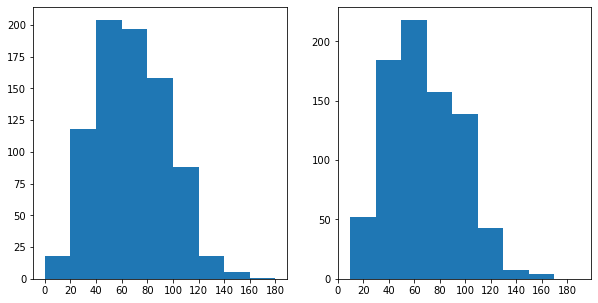

In [24]:
plt.figure(figsize = [10, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, 180+1.1, 20) # note `+1.1`, see below
plt.hist(pokemon['speed'], bins = bin_edges)
plt.xticks(np.arange(0, 180+1, 20));

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(10, 190+1, 20)
plt.hist(pokemon['speed'], bins = bin_edges)
plt.xticks(np.arange(0, 180+1, 20));

You'll notice for the left histogram, in a deviation from the examples that have come before, I've added 1.1 to the max value (180) for setting the bin edges, rather than just the desired bin width of 1. Recall that data that is equal to the rightmost bin edge gets lumped in to the last bin. This presents a potential problem in perception when a lot of data points take the maximum value, and so is especially relevant when the data takes on discrete values. The 1.1 adds an additional bin to the end to store the die rolls of value 180 alone, to avoid having the last bar catch both 160 and 180.

As an additional step, consider if a bar chart with non-connected bins might serve your purposes better. The plot below takes the code from before, but adds the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">rwidth</code> parameter to set the proportion of the bin widths that will be filled by each histogram bar.

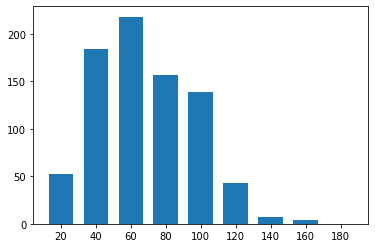

In [25]:
bin_edges = np.arange(10, 190+1, 20)
plt.hist(pokemon['speed'], bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(20, 180+1, 20));

By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.

For continuous numeric data, you should not make use of the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">rwidth</code> parameter, since the gaps imply discreteness of value. As another caution, it might be tempting to use seaborn's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">countplot</code> function to plot the distribution of a discrete numeric variable as bars. Be careful about doing this, since each unique numeric value will get a bar, regardless of the spacing in values between bars. Also, even if your data is technically discrete numeric, you should probably not consider either of the variants depicted on this page unless the number of unique values is small enough to allow for the half-unit shift or discrete bars to be interpretable. If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram than risk interpretability issues.

While you might justify plotting discrete numeric data using a bar chart, you’ll be less apt to justify the opposite: plotting ordinal data as a histogram. The space between bars in a bar chart helps to remind the reader that values are not contiguous in an ‘interval’-type fashion: only that there is an order in levels. With that space removed as in a histogram, it's harder to remember this important bit of interpretation.

### 5.1 Descriptive Statistics, Outliers, and Axis Limits
As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. Note any aspects of the data like number of modes and skew, and note the presence of outliers in the data for further investigation.

Related to the latter point, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. This page covers the topic of axis limits; the next the topic of scales and transformations. In order to change a histogram's axis limits, you can add a Matplotlib <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">xlim</code> call to your code. The function takes a tuple of two numbers specifying the left and right bounds of the region to plot. Alternatively, the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">xlim</code> function can be called with two numeric arguments to the same result.

(0.0, 120.0)

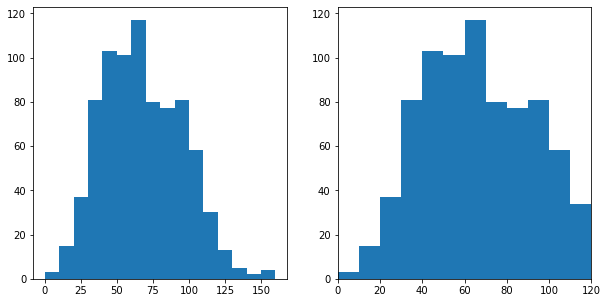

In [26]:
plt.figure(figsize = [10, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['speed'].max()+10, 10)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, 120+1, 10)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)
plt.xlim(0, 120) # could also be called as plt.xlim((0, 35))

In the generic example above, we might be interested in comparing patterns in other variables between data points that take values less than 120 to those that take values greater than 120. For anything that is concentrated on the bulk of the data in the former group (< 120), use of axis limits can allow focusing on data points in that range without needing to go through creation of a new DataFrame filtering out the data points in the latter group (> 120).

### 5.2 Scales and Transformations
Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately [log-normal](https://www.wikiwand.com/en/Log-normal_distribution) distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. Take the logarithm of those values, however, and the data looks normally distributed.

In [27]:
import numpy as np
ln_data = pd.read_csv('../data/in_data.csv')
ln_data = ln_data['value']

Text(0.5, 0, 'log(values)')

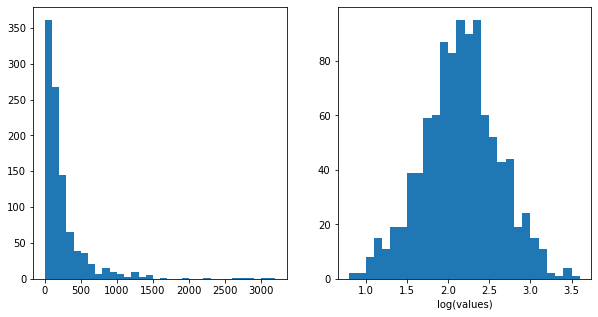

In [28]:
plt.figure(figsize = [10, 5])

# histogram on left: natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, ln_data.max()+100, 100)
plt.hist(ln_data, bins = bin_edges)

# histogram on right: directly log-transform data
plt.subplot(1, 2, 2)
log_ln_data = np.log10(ln_data)
log_bin_edges = np.arange(0.8, log_ln_data.max()+0.1, 0.1)
plt.hist(log_ln_data, bins = log_bin_edges)
plt.xlabel('log(values)') # add axis label for clarity

In the left plot, the high-value points above 200 mash most of the points into the bins on the far left. With the right plot, the logarithmic transform makes those points look in line with the rest, with the data looking unimodal overall. The big problem with the right-side plot is that the units on the x-axis are difficult to interpret: for most people, it is only easy to convert from log values to natural values on the integers (and this assumes a nice base like 10 as used in the example).

This is where scale transformations are handy. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units. It is also a convenient approach since you won't need to engineer new features. Matplotlib's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">xscale</code> function includes a few built-in transformations: we'll use the 'log' scale here.

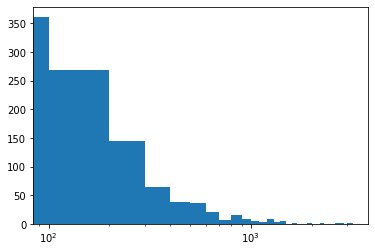

In [29]:
bin_edges = np.arange(0, ln_data.max()+100, 100)
plt.hist(ln_data, bins = bin_edges)
plt.xscale('log')

Notice two things about the plot now. Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicatively. Secondly, the default label settings are still somewhat tricky to interpret, and are sparse as well.

To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead. For the ticks, we can use <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">xticks</code> to specify locations and labels in their natural units. Remember: we aren't changing the values taken by the data, only how they're displayed. Between integer powers of 10, we don't have clean values for even markings, but we can still get close. Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.

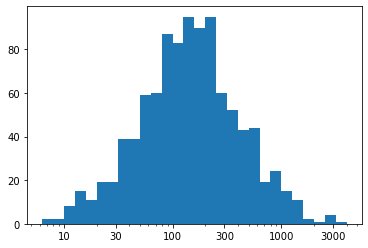

In [30]:
bin_edges = 10 ** np.arange(0.8, np.log10(ln_data.max())+0.1, 0.1)
plt.hist(ln_data, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs);

It is important that the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">xticks</code> are specified after <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">xscale</code> since that function has its own built-in tick settings.

We've ended up with the same plot as when we performed the direct log transform, but now with a much nicer set of tick marks and labels.

### 5.3 Alternative Approach
Be aware that a logarithmic transform is not the only one possible. When we perform a logarithmic transform, our data values have to all be positive; it's impossible to take a log of zero or a negative number. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. The type of transform that you choose may be informed by the context for the data. For example, [this Wikipedia section](https://www.wikiwand.com/en/Log-normal_distribution#/Occurrence_and_applications) provides a few examples of places where log-normal distributions have been observed.

If you want to use a different transformation that's not available in <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">xscale</code>, then you'll have to perform some feature engineering. In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) We can create a visualization on this transformed scale like this:

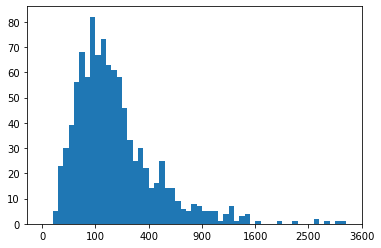

In [31]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

bin_edges = np.arange(0, sqrt_trans(ln_data.max())+1, 1)
plt.hist(ln_data.apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(ln_data.max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

Note that <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">ln_data</code> is a pandas Series, so we can use the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">apply</code> method for the function. If it were a NumPy Array, we would need to apply the function like in the other cases. The tick locations could have also been specified with the natural values, where we apply the standard transform function on the first argument of <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">xticks</code> instead.

## 6. Scatterplots
If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second. One basic way of creating a scatterplot is through Matplotlib's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">scatter</code> function:

In [100]:
fuel_econ = pd.read_csv('../data/fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic


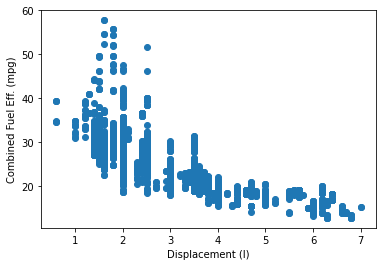

In [101]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

We can see a generally positive relationship between the two variables, as higher values of the x-axis variable are associated with greatly increasing values of the variable plotted on the y-axis.



### Alternative Approach
Seaborn's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">regplot</code> function combines scatterplot creation with regression function fitting:

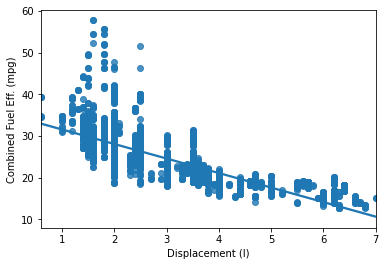

In [102]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

By default, the regression function is linear, and includes a shaded confidence region for the regression estimate. In this case, since the trend looks like a <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">log(y) ~ x</code> relationship, plotting the regression line on the raw units is not appropriate. If we don't care about the regression line, then we could set <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">reg_fit = False</code> in the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">regplot</code> function call. Otherwise, if we want to plot the regression line on the observed relationship in the data, we need to transform the data, as seen in the previous lesson.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


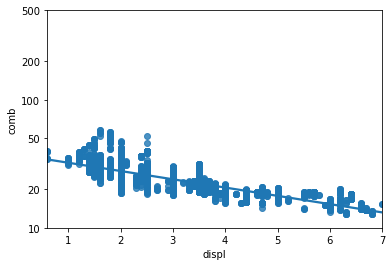

In [103]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs);

Note that the x- and y- values can be set as Series or arrays directly, instead of columns from a reference dataframe.

## 7. Overplotting, Transparency, and Jitter

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

(2012.0, 2019.0)

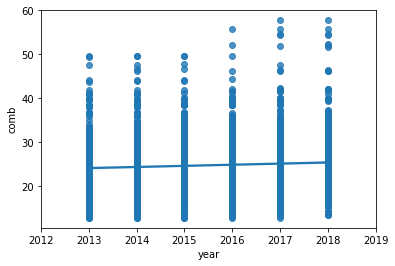

In [104]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb')
plt.xlim([2012, 2019])

In the above plot, we can infer some kind of negative relationship between the two variables, but the degree of variability in the data and strength of relationship are fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative. Transparency can be added to a <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">scatter</code> call by adding the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">alpha</code> parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque).

(2012.0, 2019.0)

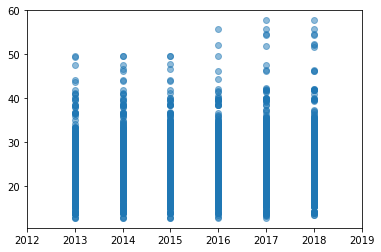

In [105]:
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=0.5)
plt.xlim([2012, 2019])

Where more points overlap, the darker the image will be. Here, we can now see that there is a moderate negative relationship between the two numeric variables. Values of 0 and 10 on the x-axis are much rarer than the central values.

As an alternative or companion to transparency, we can also add jitter to move the position of each point slightly from its true value. This is not a direct option in the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">scatter</code> function, but is a built-in option with seaborn's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">regplot</code> function. x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made:

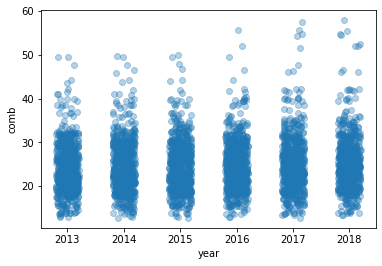

In [106]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

The jitter settings will cause each point to be plotted in a uniform ±0.2 range of their true values. Note that transparency has been changed to be a dictionary assigned to the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">scatter_kws</code> parameter. This is necessary so that transparency is specifically associated with the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">scatter</code> component of the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">regplot</code> function.

## 8. Heat Maps

A **heat map** is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">hist2d</code> function.

In [107]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


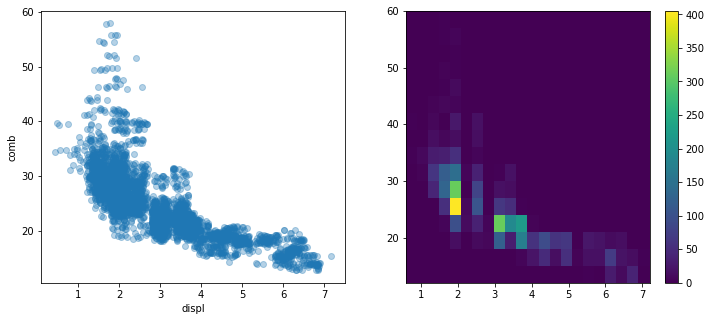

In [108]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', bins = [bins_x, bins_y])
plt.colorbar();

Notice that since we have two variables, the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">bins</code> parameter takes a list of two bin edge specifications, one for each dimension. Choosing an appropriate bin size is just as important here as it was for the univariate histogram. We add a colorbar function call to add a <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">colorbar</code> to the side of the plot, showing the mapping from counts to colors.

As the color in the heatmap gets brighter and moves from blue to yellow, the higher the count of points in the corresponding cell.

Heatmaps can also be used as 2-d versions of bar charts, plotting counts on combinations of two categorical variables instead of numeric variables. There is a function in seaborn, <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">heatmap</code>, that is built for categorical heatmaps. This will be discussed in more detail later in the lesson, in the section "Clustered Bar Charts".

### Additional Variations
To select a different color palette, you can set the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">cmap</code> parameter in <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">hist2d</code>. The most convenient way of setting a palette is to use a string referencing a built-in Matplotlib palette. A list of valid strings can be found on [this part](https://matplotlib.org/stable/api/pyplot_summary.html) of the Pyplot API documentation. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of reversing the default "viridis" color palette, by setting <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">cmap = 'viridis_r'</code>.

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">cmin = 0.5</code> parameter to the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">hist2d</code> call, this means that a cell will only get colored if it contains at least one point.

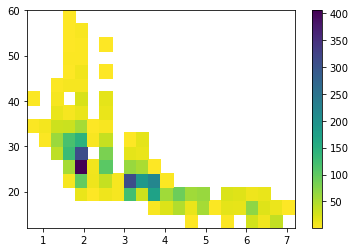

In [109]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r',
           bins = [bins_x, bins_y])
plt.colorbar();

If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">hist2d</code>, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. We can get the counts to annotate directly from what is returned by <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">hist2d</code>, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

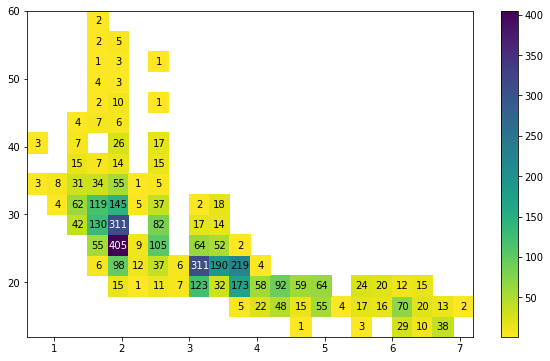

In [110]:
# hist2d returns a number of different variables, including an array of counts
plt.figure(figsize=(10, 6))
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r',
           bins = [bins_x, bins_y])
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 300: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.15, bins_y[j]+1.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.15, bins_y[j]+1.5, int(c),
                     ha = 'center', va = 'center', color = 'black')
plt.colorbar();

If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves. You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">heatmap</code> function for just that, as will be seen later.

## 9. Violin Plots
There are a few ways of plotting the relationship between **one quantitative and one qualitative variable**, that demonstrate the data at different levels of abstraction. The **violin plot** is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

Seaborn's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">violinplot</code> function can be used to create violin plots combined with box plots – we'll discuss box plots on the next page.

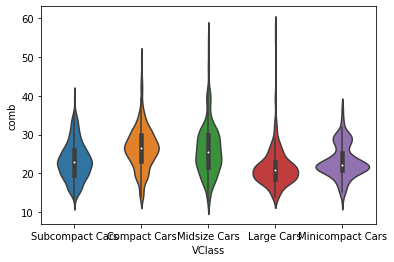

In [111]:
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb');

Here, you can see that the numeric data takes on a different shape in each categorical level: Some bimodality is suggested in group Alpha, a relatively high variance is observed in Beta, and Gamma and Delta are skewed negatively and positively, respectively. You can also see that each level has been rendered in a different color, like how the plain <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">countplot</code> was in the previous lesson. We can set the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">color</code> parameter to make each curve the same color if it is not meaningful.

Inside each curve, there is a black shape with a white dot inside. This is the miniature box plot mentioned above. A further discussion of box plots will be performed on the next page. If you'd like to remove the box plot, you can set the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">inner = None</code> parameter in the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">violinplot</code> call to simplify the look of the final visualization.

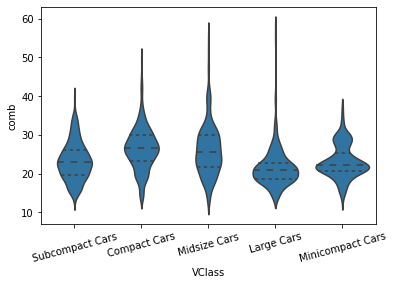

In [112]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color,
              inner = 'quartile')
plt.xticks(rotation=15);

### Additional Variation
Much like how the bar chart could be rendered with horizontal bars, the violin plot can also be rendered horizontally. Seaborn is smart enough to make an appropriate inference on which orientation is requested, depending on whether "x" or "y" receives the categorical variable. But if both variables are numeric (e.g., one is discretely-valued) then the "orient" parameter can be used to specify the plot orientation.

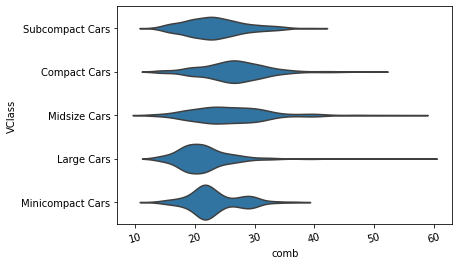

In [113]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'comb', y = 'VClass', color = base_color,
              inner = None)
plt.xticks(rotation=15);

## 10. Box Plots
A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">boxplot</code> function.

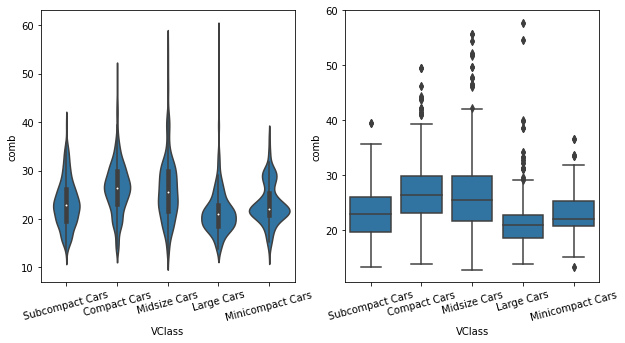

In [114]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation=15);

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation=15);

Note that the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">color</code> parameter is being used here to make each box the same color. In order to provide a better comparison of the violin and box plots, a <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">ylim</code> expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">violinplot</code> is assigned to a variable, <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">ax1</code> is used to programmatically obtain those limit values.

(Documentation: [Axes objects](https://matplotlib.org/stable/api/axes_api.html))

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default this is 1.5 times the IQR. For the Minicompact Cars class, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Large Cars group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the Midsize Cars class values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

### Additional Variations
As with <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">violinplot</code>, <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">boxplot</code> can also render horizontal box plots by setting the numeric and categorical features to the appropriate arguments.

<AxesSubplot:xlabel='comb', ylabel='VClass'>

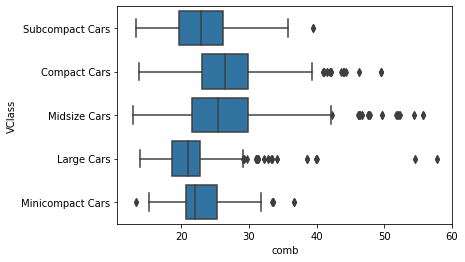

In [115]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'comb', y = 'VClass', color = base_color)

In <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">violinplot</code>, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">inner = 'quartile'</code>, three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

<AxesSubplot:xlabel='VClass', ylabel='comb'>

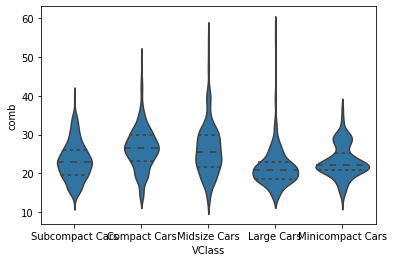

In [116]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color,
              inner = 'quartile')

## 11. Clustered Bar Charts
To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a **clustered bar chart**. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">countplot</code> function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">hue</code> argument:

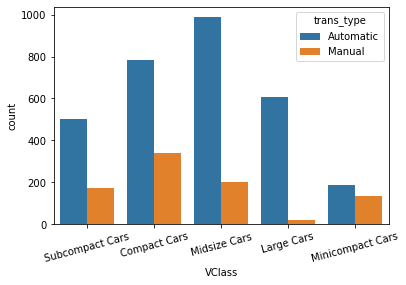

In [120]:
sb.countplot(data=fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation = 15);

The first categorical variable is depicted by broad x-position (Subcompact Cars, Compact Cars, Midsize Cars, Large Cars, and Minicompact Cars). Within each of these groups, two bars are plotted, one for each level of the second categorical variable (Automatic and Manual). Color differentiates each level, and is documented with the legend in the upper-right corner of the plot.

The legend position in this example is a bit distracting, however. We can use an [Axes method](https://matplotlib.org/stable/api/axes_api.html) to set the legend properties on the Axes object returned from <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">countplot</code>.

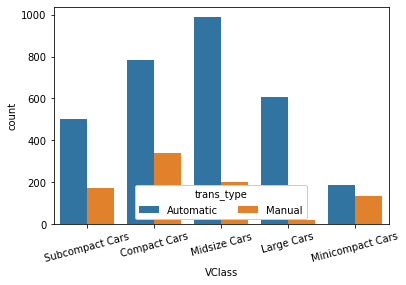

In [122]:
ax = sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
ax.legend(loc = 8, ncol = 2, framealpha = 1, title = 'trans_type')
plt.xticks(rotation = 15);

(Documentation: [Axes.legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html))

## 12. Faceting
One general visualization technique that will be useful for you to know about to handle plots of two or more variables is **faceting**. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (<code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">VClass</code> in our example). Then we use the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">map</code> method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, histogram on <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">comb</code>).

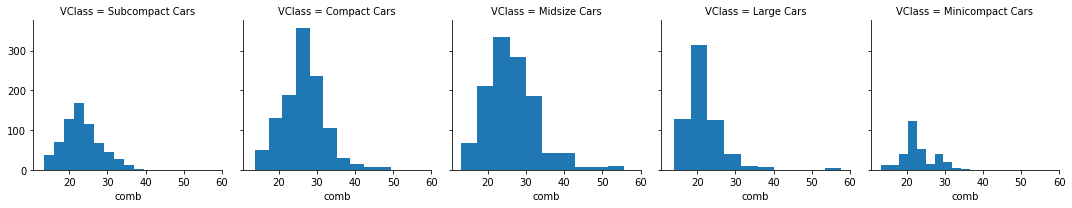

In [126]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, 'comb');

In the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">map</code> call, just set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments, like <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">x = "comb"</code>, or the mapping won't work properly.

Notice that each subset of the data is being plotted independently. Each uses the default of ten bins from <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">hist</code> to bin together the data, and each plot has a different bin size. Despite that, the axis limits on each facet are the same to allow clear and direct comparisons between groups. It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">map</code> function.

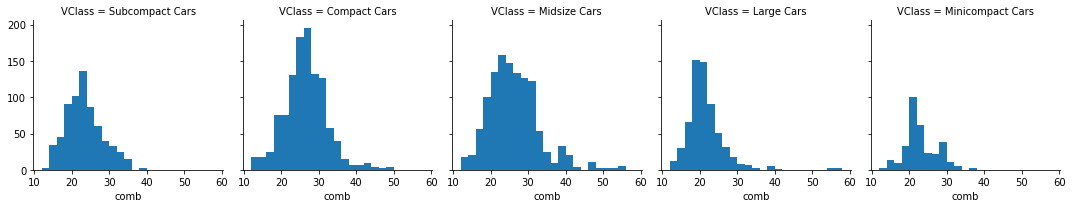

In [133]:
bin_edges = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, 'comb', bins = bin_edges);

### Additional Variation
If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object initialization to facilitate clarity in conveyance of information. In the example above, Setting <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">col_wrap = 3</code> means that the plots will be organized into rows of three facets each, rather than a single long row of five plots.

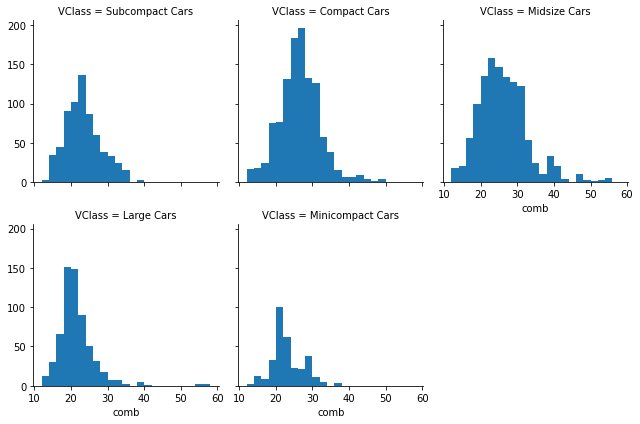

In [134]:
bin_edges = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3)
g.map(plt.hist, 'comb', bins = bin_edges);

## 13. Line Plots
The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a **time series** plot. Often, we have only one observation per time period, like in stock or currency charts. While there is a seaborn function <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">tsplot</code> that is intended to be used with time series data, it is fairly specialized and (as of this writing's seaborn 0.8) is slated for major changes.

Instead, we will make use of Matplotlib's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">errorbar</code> function, performing some processing on the data in order to get it into its necessary form.

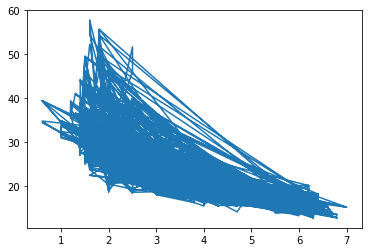

In [136]:
plt.errorbar(data = fuel_econ, x = 'displ', y = 'comb');

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

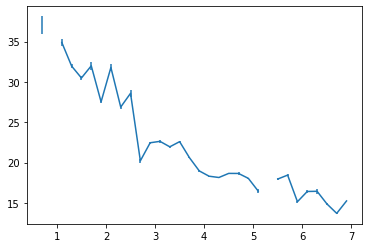

In [138]:
# set bin edges, compute centers
xbin_edges = np.arange(0.6, 7+0.2, 0.2)
xbin_centers = xbin_edges[:-1] + 0.1

# compute statistics in each bin
data_xbins = pd.cut(fuel_econ['displ'], xbin_edges, right = False, include_lowest = True)
y_means = fuel_econ['comb'].groupby(data_xbins).mean()
y_sems = fuel_econ['comb'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems);

Since the x-variable ('num_var1') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean. Note that the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">cut</code> function call is different here than in the previous section, since we don't need to compute individual point weights.

An interesting part of the above summarization of the data is that the uncertainty in the mean generally increases with increasing x-values. But for the largest two points, there are no error bars. Looking at the default <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">errorbar</code> plot (or the scatterplot below), we can see this is due to there only being one point in each of the last two bins.